# Logistic Regression

## Fundamentos de la tecnica

La Regresión Logística es un algoritmo de clasificación supervisada que modela la probabilidad de pertenecer a una clase.  
Aunque es un modelo lineal, utiliza la función sigmoide para convertir la salida en valores entre 0 y 1.

Es ideal para:
- Clasificación binaria
- Clasificación multiclase (usando estrategia one-vs-rest o multinomial)

Ventajas:
- Modelo rápido, estable y muy interpretativo.
- Funciona bien con datos numéricos.
- Produce probabilidades, no solo predicciones.

En este notebook aplicamos Regresión Logística al dataset WINE, el cual consiste en clasificar vinos en 3 tipos diferentes basados en sus características químicas.

## Modelo Matematico

La regresión logística estima la probabilidad de una clase mediante la función sigmoide:

$$ 
P(y=1 | x) = \sigma(w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}} 
$$

En problemas multiclase (k clases) se usa la función softmax:

%% P(y = k | x) = \frac{e^{z_k}}{\sum_j e^{z_j}} %%

donde:
- $$ z_k = w_k^T x + b_k $$
- Cada clase tiene su propio vector de pesos %% w_k %%

El modelo se entrena minimizando la pérdida logarítmica:

$$ J = - \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log(\hat{y}_k^{(i)}) $$

## 1.3 Librerías utilizadas

### pandas  
Manejo y análisis de datos tabulares.

### numpy  
Operaciones numéricas y manejo de arreglos.

### matplotlib  
Visualización de datos (gráficas como Scatter Plot).

### scikit-learn  
Librería principal para Machine Learning. Utilizaremos:
- `load_wine` → carga el dataset
- `train_test_split` → divide datos
- `StandardScaler` → estandariza características
- `LogisticRegression` → modelo de clasificación
- `confusion_matrix`, `accuracy_score` → métricas de evaluación

## Pipeline


### Importacion de Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Cargar dataset WINE
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Preprocesamiento

In [2]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


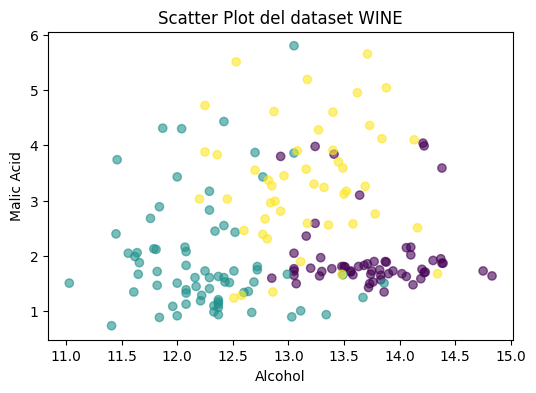

In [3]:
# Scatterplot
plt.figure(figsize=(6,4))
plt.scatter(df["alcohol"], df["malic_acid"], c=df["target"], alpha=0.6)
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.title("Scatter Plot del dataset WINE")
plt.show()

In [4]:
# Division entre train/test y escalado

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Entrenamiento

model = LogisticRegression(max_iter=500, multi_class="multinomial")
model.fit(X_train, y_train)

C:\Users\ID858\OneDrive\Desktop\INNI\Tareas\7mo_semestre\Clasificacion_inteligente\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'multinomial'


## Prediccion

In [6]:
def predecir_patron(patron):
    patron = np.array(patron).reshape(1, -1)
    patron = scaler.transform(patron)
    pred = model.predict(patron)[0]
    return f"Clase predicha: {pred}"

# Ejemplo usando el primer registro real
ejemplo = X.iloc[0]
print(predecir_patron(ejemplo))

Clase predicha: 0


C:\Users\ID858\OneDrive\Desktop\INNI\Tareas\7mo_semestre\Clasificacion_inteligente\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
# Crear heatmap
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.title("Matriz de Confusión (Heatmap)")
plt.colorbar()

# Etiquetas
clases = data.target_names
tick_marks = np.arange(len(clases))
plt.xticks(tick_marks, clases, rotation=45)
plt.yticks(tick_marks, clases)

# Mostrar valores dentro de la matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > cm.max()/2 else 'black')

plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.tight_layout()
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

NameError: name 'cm' is not defined

<Figure size 600x500 with 0 Axes>

El heatmap muestra gráficamente la matriz de confusión, donde:

- Cada celda indica cuántas muestras fueron clasificadas en cada categoría.
- Los colores más intensos representan cantidades más altas.
- La diagonal principal contiene las predicciones correctas.
- Los valores fuera de la diagonal representan errores del modelo.

Un modelo con buen rendimiento mostrará valores altos en la diagonal y bajos en el resto de la matriz.

La métrica accuracy mide la proporción de predicciones correctas:

$$ Accuracy = \frac{\text{Predicciones correctas}}{\text{Total de predicciones}} $$

Un accuracy alto indica que el modelo clasifica correctamente la mayoría de los vinos en sus clases.

En este caso, la accuracy de 1.0 indica que el modelo calsifica perfectamente los valores dentro del dataset, no obstante, ello indica overffiting, lo que puede ser contraproducente cuando se intenta realizar predicciones para casos que se encuentran fuera del modelo.

## Conclusión

La Regresión Logística demostró ser una técnica efectiva para resolver problemas de clasificación supervisada, incluso en escenarios multiclase como el dataset WINE. Su fundamento matemático basado en la función sigmoide y, en el caso multiclase, la función softmax, permite modelar probabilidades que facilitan la interpretación del comportamiento del modelo.

Durante el experimento, se aplicó un proceso completo que incluyó el preprocesamiento del dataset, la estandarización de variables, la construcción del modelo y la evaluación de su rendimiento. Los resultados obtenidos —incluyendo una alta accuracy y una matriz de confusión con valores correctos en la diagonal principal— indican que la Regresión Logística puede capturar adecuadamente las relaciones entre las características químicas del vino y su clase correspondiente.

Si bien una accuracy perfecta podría sugerir riesgo de sobreajuste en contextos más complejos, este dataset presenta una separación natural entre clases, lo que permite que modelos lineales como la Regresión Logística desempeñen un papel sobresaliente sin necesariamente perder capacidad de generalización.

En conclusión, la Regresión Logística es un modelo robusto y eficiente para tareas de clasificación, especialmente cuando se trabaja con datos bien estructurados, numéricos y con clases claramente diferenciadas. Su interpretabilidad, rapidez y estabilidad la convierten en una herramienta fundamental dentro del aprendizaje automático clásico.